In [1]:
import pandas as pd

In [2]:
from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Float

In [ ]:
# import csvs

In [ ]:
# combine csvs that can be combined

In [ ]:
# Base = declarative_base()

# class Fast_Food(Base):
#     __tablename__ = "sales"
#     id = Column(Integer, primary_key = True)
#     company = Column("company", String(255), foreign_key = )
    
#     # keep going
    


In [41]:
df = pd.read_csv("assets/data/Cleaned_Categories.csv")

In [42]:
df.head()

,name,categories,city,state,postalCode,latitude,longitude
0,90 Miles Cuban Cafe,Ethnic,Chicago,IL,60618,41.937897,-87.685781
1,A's Ace Burgers,Burger,Dana Point,CA,92629,33.464500,-117.684500
2,A&W/Long John Silvers,Seafood,Belle Vernon,PA,15012,40.136482,-79.842820
3,Abruzzi Pizza,Pizza,Brookhaven,PA,19015,39.872570,-75.387220
4,Acropolis Gyro Palace,Ethnic,Columbus,OH,43214,40.071324,-83.018535


In [4]:
demo = pd.read_csv("assets/data/State_Pop_Demographics_Restaurants.csv")
demo.head()

,state abbr,number of restaurants,poverty,povertyMoe,age,ageMoe,income,incomeMoe,healthcare,healthcareLow,healthcareHigh,obesity,obesityLow,obesityHigh,smokes,smokesLow,smokesHigh,rank,﻿State,population
0,CA,1201,16.4,0.2,36.0,0.1,61933,238,14.8,13.8,15.8,24.7,23.5,25.9,12.9,11.9,13.8,1,California,39557045
1,TX,811,17.2,0.2,34.3,0.1,53035,377,24.9,23.7,26.1,31.9,30.6,33.3,14.5,13.6,15.5,2,Texas,28701845
2,FL,621,16.5,0.3,41.6,0.1,47463,329,17.6,16.4,18.8,26.2,25.0,27.5,17.7,16.5,18.8,3,Florida,21299325
3,OH,522,15.8,0.3,39.4,0.1,49308,363,10.2,9.2,11.3,32.6,31.2,34.1,21.0,19.7,22.3,7,Ohio,11689442
4,GA,420,18.3,0.4,36.1,0.1,49321,543,20.9,19.3,22.5,30.5,28.9,32.1,17.4,15.9,18.8,8,Georgia,10519475


In [8]:
# demo.nunique()

In [7]:
US_population = demo.population.sum()
US_population

326464979

In [10]:
top_50 = pd.read_csv("assets/data/Fast_Food_Sales.csv")
top_50.head()

,Company,Category,2016 U.S. Systemwide Sales (millions),2016 U.S. Average Sales Per Unit (thousands),Number of Franchised Units in 2016,Number of Company Units in 2016,Total Units in 2016
0,McDonald's,Burger,36389.00,2550.00,13046,1109,14155
1,Starbucks,Snack,14795.40,1123.25,5292,7880,13172
2,Subway,Sandwich,11300.00,422.52,26744,0,26744
3,Wendy's,Burger,9510.00,1454.80,6207,330,6537
4,Burger King,Burger,9749.19,1361.43,7111,50,7161


In [13]:
# The number of restaurants in the top 50 in terms of locations is one for every 2043 Americans
per_capita_rest = US_population/top_50["Total Units in 2016"].sum()
per_capita_rest

2043.062099479323

In [15]:
# McDonald's per capita -- one for every 23,000 Americans 
US_population/14155

23063.5802896503

In [16]:
# Subway per capita -- one for every 12,200 Americans
US_population/26744

12207.036307209093

In [19]:
top_5_sales = top_50.sort_values(by = "2016 U.S. Systemwide Sales (millions)", ascending = False).head()

In [25]:
top_5_location = top_50.sort_values(by = "Total Units in 2016", ascending = False).head()

In [26]:
top_5_sales_per_location = top_50.sort_values(by = "2016 U.S. Average Sales Per Unit (thousands)", 
                                          ascending = False).head()

In [75]:
top_50["2016 U.S. Systemwide Sales (millions)"].sum()*1000000


189363670000.0

In [35]:
US_population/top_50["2016 U.S. Systemwide Sales (millions)"].sum()

1724.0106246356547

In [47]:
df.nunique()

name           490
categories      26
city          2759
state           50
postalCode    5419
latitude      9286
longitude     9291
dtype: int64

In [46]:
df.groupby("name").size().nlargest()

name
McDonald's     1949
Taco Bell      1036
Subway          849
Burger King     835
Arby's          669
dtype: int64

In [50]:
df.groupby("categories").size().nlargest(6)

categories
Burger      4712
Sandwich    1843
Ethnic      1455
Chicken      652
Pizza        588
Snack        448
dtype: int64

(-1.1145258969613883,
 1.1006917129393532,
 -1.1014703557536354,
 1.1110041936945576)

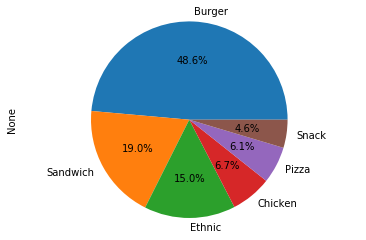

In [52]:
df.groupby("categories").size().nlargest(6).plot(kind = "pie", autopct="%1.1f%%").axis("equal")

(-1.121108900596207,
 1.1010051857426766,
 -1.1143070391181833,
 1.1190411582424262)

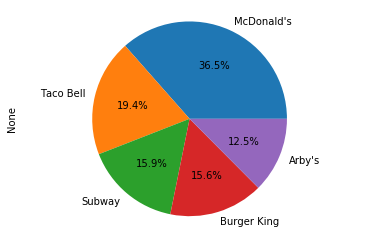

In [53]:
df.groupby("name").size().nlargest().plot(kind = "pie", autopct="%1.1f%%").axis("equal")

(-1.1000000113671495,
 1.100000021251625,
 -1.1179348023854199,
 1.1179347973199905)

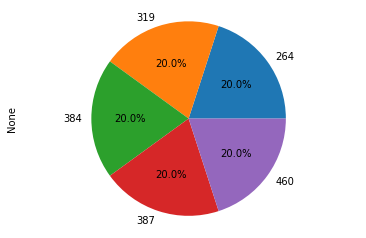

In [55]:
top_50.groupby("Total Units in 2016").size().nlargest().plot(kind = "pie", autopct="%1.1f%%").axis("equal")

In [68]:
top_5_sales

,Company,Category,2016 U.S. Systemwide Sales (millions),2016 U.S. Average Sales Per Unit (thousands),Number of Franchised Units in 2016,Number of Company Units in 2016,Total Units in 2016
0,McDonald's,Burger,36389.00,2550.00,13046,1109,14155
1,Starbucks,Snack,14795.40,1123.25,5292,7880,13172
2,Subway,Sandwich,11300.00,422.52,26744,0,26744
4,Burger King,Burger,9749.19,1361.43,7111,50,7161
3,Wendy's,Burger,9510.00,1454.80,6207,330,6537


In [76]:
top_5_location

,Company,Category,2016 U.S. Systemwide Sales (millions),2016 U.S. Average Sales Per Unit (thousands),Number of Franchised Units in 2016,Number of Company Units in 2016,Total Units in 2016
2,Subway,Sandwich,11300.0,422.52,26744,0,26744
0,McDonald's,Burger,36389.0,2550.00,13046,1109,14155
1,Starbucks,Snack,14795.4,1123.25,5292,7880,13172
6,Dunkin' Donuts,Snack,8200.0,928.86,8828,0,8828
8,Pizza Hut,Pizza,5751.4,740.00,7371,318,7689


In [63]:
df.groupby("state")["name"].count().head()

state
AK      16
AL       6
AR     102
AZ     329
CA    1196
Name: name, dtype: int64

In [77]:
# Starbucks locations: 13172 Sales: 363,890,000,000
# McDonald's locations: 14155 Sales: 147,954,000,000

top_5_sales_per_location

,Company,Category,2016 U.S. Systemwide Sales (millions),2016 U.S. Average Sales Per Unit (thousands),Number of Franchised Units in 2016,Number of Company Units in 2016,Total Units in 2016
7,Chick-fil-A,Chicken,7973.50,4407.1,1730,372,2102
22,Whataburger,Burger,2181.35,2706.0,122,684,806
10,Panera Bread,Sandwich,5200.00,2700.0,1134,908,2042
42,Jason's Deli,Sandwich,646.59,2609.0,109,155,264
0,McDonald's,Burger,36389.00,2550.0,13046,1109,14155


In [78]:
top_50.groupby("Category").sum()

,2016 U.S. Systemwide Sales (millions),2016 U.S. Average Sales Per Unit (thousands),Number of Franchised Units in 2016,Number of Company Units in 2016,Total Units in 2016
Category,,,,,
Burger,75434.17,21850.08,36504,5116,41620
Chicken,21916.73,16343.87,10888,1993,12881
Ethnic,18948.90,9739.53,6886,5945,12831
Pizza,18508.41,4017.14,20267,2094,22401
Sandwich,24993.02,10721.38,35379,2287,37666
Seafood,544.43,1059.00,227,289,516
Snack,29018.01,5735.80,23907,7970,31877


In [83]:
demo.sort_values(by = "state abbr").head()

,state abbr,number of restaurants,poverty,povertyMoe,age,ageMoe,income,incomeMoe,healthcare,healthcareLow,healthcareHigh,obesity,obesityLow,obesityHigh,smokes,smokesLow,smokesHigh,rank,﻿State,population
46,AK,16,11.2,0.9,33.3,0.3,71583,1784,15.0,13.3,16.6,29.7,27.8,31.6,19.9,18.2,21.6,48,Alaska,737438
49,AL,6,19.3,0.5,38.6,0.2,42830,598,13.9,12.7,15.1,33.5,32.1,35.0,21.1,19.8,22.5,24,Alabama,4887871
29,AR,102,18.9,0.5,37.8,0.2,41262,653,16.3,14.4,18.2,35.9,33.8,38.0,24.7,22.7,26.7,33,Arkansas,3013825
9,AZ,330,18.2,0.4,36.9,0.1,50068,483,14.4,13.3,15.6,28.9,27.7,30.2,16.5,15.4,17.6,14,Arizona,7171646
0,CA,1201,16.4,0.2,36.0,0.1,61933,238,14.8,13.8,15.8,24.7,23.5,25.9,12.9,11.9,13.8,1,California,39557045


In [84]:
# Alaska has five sandwich shops: 4 Subways and a Quizno's, and only 16 restaurants listed
# Most popular category is sandwich
5/16

0.3125

In [85]:
top_50["Total Units in 2016"].sum()

159792

In [87]:
df.state.size().nsmallest()

TypeError: 'int' object is not callable